In [1]:
import os
import time
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from threading import Thread, Event

In [2]:
class MemoryMonitor(Thread):

    def __init__(self, interval):
        Thread.__init__(self)
        self.daemon = True
        self.interval = interval
        self.process = psutil.Process(os.getpid())
        self.buffer = []
        self.stopped = Event()

    def monitor(self):
        self.buffer.append((time.time(), self.process.memory_info().rss))
        
    def run(self):
        while not self.stopped.wait(self.interval):
            self.monitor()

    def stop(self):
        self.stopped.set()

In [3]:
GB = 1024**3/8

Text(0.5, 1.0, 'Peak=7696883712.0\nElapsed=8.13697075843811')

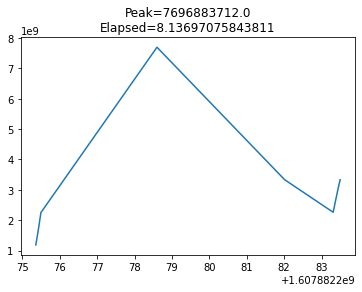

In [4]:
data = np.ones(int(1*GB), dtype='float64')

monitor = MemoryMonitor(0.001)
monitor.start()
df = pd.DataFrame()
df['MyCol'] = data
monitor.stop()

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=1190674432.0\nElapsed=0.0')

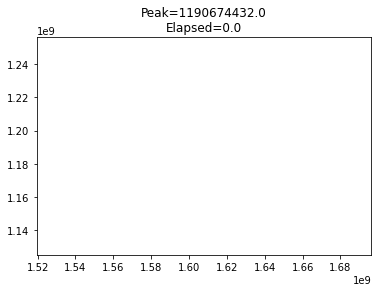

In [5]:
data = np.ones(int(1*GB), dtype='float64')

monitor = MemoryMonitor(0.001)
monitor.start()
df = pd.DataFrame(data=data, columns=['MyCol'])
monitor.stop()

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=3466760192.0\nElapsed=21.211085081100464')

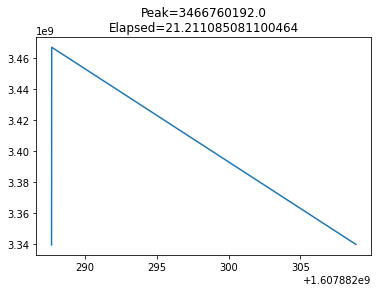

In [6]:
data = [1]*int(1*GB)

monitor = MemoryMonitor(0.001)
monitor.start()
df = pd.DataFrame(data=data, columns=['MyCol'])
monitor.stop()

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=3338776576.0\nElapsed=0.19374823570251465')

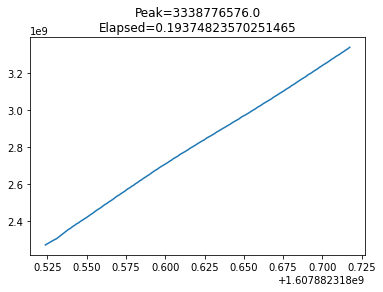

In [7]:
data = np.array([1]*int(1*GB), dtype='float64')

monitor = MemoryMonitor(0.001)
monitor.start()
df = pd.DataFrame(data=np.array(data), columns=['MyCol'])
monitor.stop()

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))

Text(0.5, 1.0, 'Peak=3341455360.0\nElapsed=0.20038437843322754')

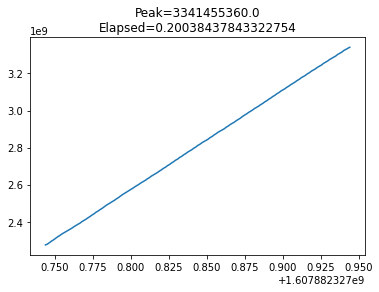

In [8]:
data = np.empty(int(1*GB), dtype='float64')
data[:] = [1]*int(1*GB)

monitor = MemoryMonitor(0.001)
monitor.start()
df = pd.DataFrame(data=np.array(data), columns=['MyCol'])
monitor.stop()

arr = np.array(monitor.buffer)
plt.plot(arr[:, 0], arr[:, 1])
plt.title('Peak={}\nElapsed={}'.format(np.max(arr[:, 1]), arr[:, 0][-1]-arr[:, 0][0]))